In [1]:
%matplotlib inline
import lightkurve as lk
from lightkurve_ext import download_lightcurvefiles, of_sector, of_sectors
import tic_plot as tplt

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplotlib

import pandas as pd
import astropy as astropy
from astropy.io import fits

In [2]:
# Possible Candidates, not a TOI yet
# the dips look a tad V-shape though.
tic1 = 116246139

# Load the light_curves into collection
lcf_coll = download_lightcurvefiles(f"TIC{tic1}", mission='TESS', download_dir='./data')
print(len(lcf_coll))


2


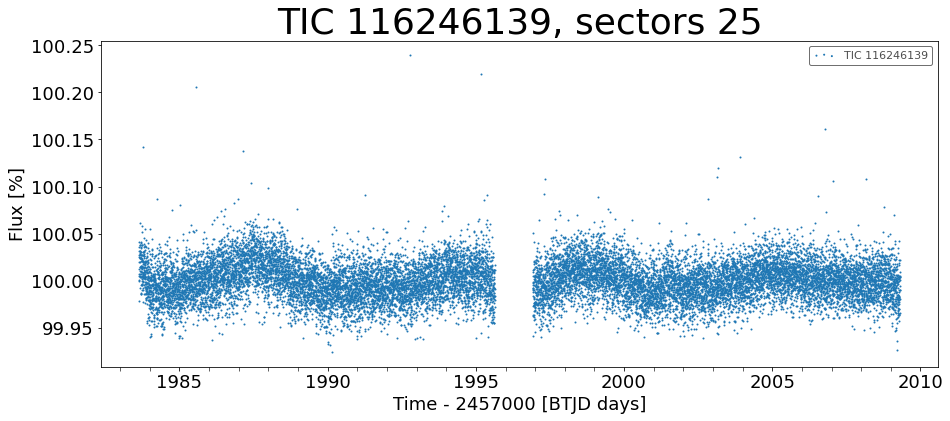

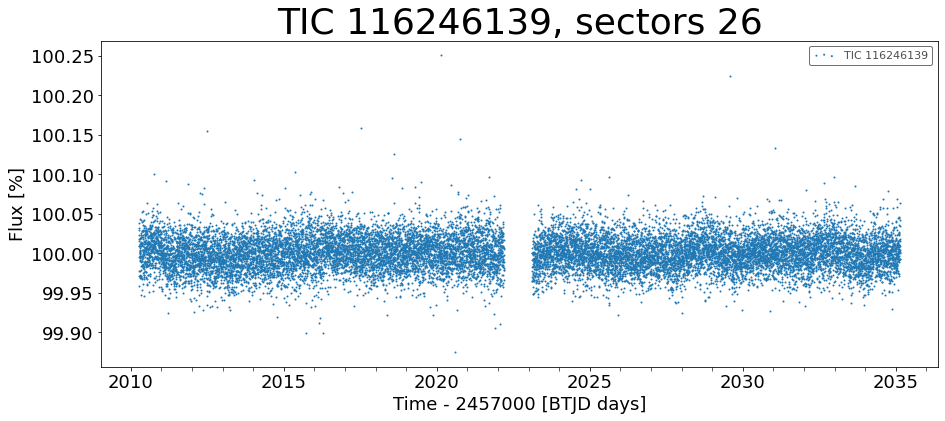

In [4]:
tplt.plot_all(lcf_coll)

Text(0.5, 1.0, 'TIC 116246139 Centroids')

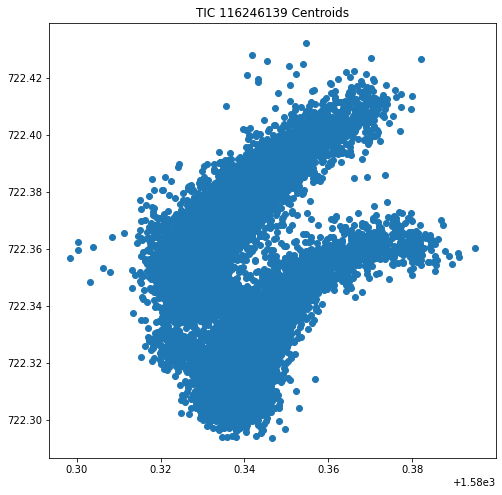

In [3]:
lcf = of_sector(lcf_coll, 25)
lc = lcf.PDCSAP_FLUX

fig = plt.figure(figsize=(8,8))
fig.gca().scatter(lc.centroid_col, lc.centroid_row)
fig.gca().set_title(f'TIC {lc.targetid} Centroids')


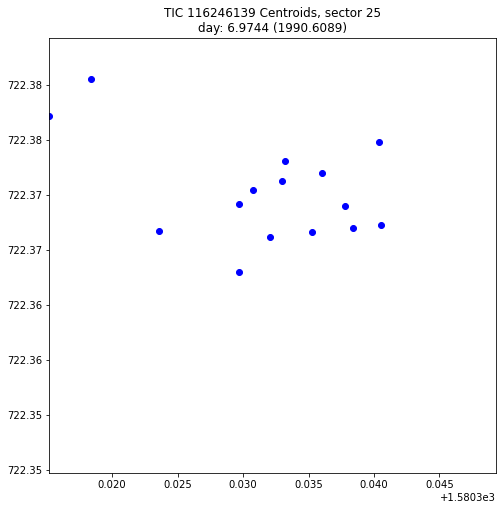

In [4]:
# from importlib import reload 
# reload(tplt)

tplt.animate_centroids(lcf
                       , fig=plt.figure(figsize=(8,8))
                       , num_obs_per_frame = 15 # 30 minutes per frame for 2-minute cadence
#                        , frames=list(map(lambda n: int(n), np.linspace(720, 720 + 720, num=24, endpoint=True)))
                       , interval=750  # time for each frame
                       , time_range=(1989.13, 1990.63)  # only show part of the lightcurve for the give time range
                       , c='blue'
                       , accumulative=False
                       , use_relative_time=True # display relative time in output
                      )
